ANALISANDO O ENGAJAMENTO DO INSTAGRAM

O QUE QUEREMOS RESPONDER?

    - Qual tipo de conteúdo mais engaja no instagram da minha empresa?
    - Temos a base de dados do instagram desde que o usuário começou a postar na marca até o dia 27/março

    - Ele também dá alguns direcionamentos:
        - Pode ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
        - Tags vazias é que realmente não possuem tags (favor tratar como vazio)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_engajamento =  pd.read_excel('base_engajamento.xlsx')

In [4]:
base_engajamento.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


APRENDIZADO DO PROJETO:

O .drop() permite apagar uma coluna ou linha da base
base.drop(nome_coluna, axis=1)

 - O axis=1 se refere a coluna, enquanto axis=0 se refere a linha
 - Devemos passar o nome da coluna que queremos apagar da base
 - Em casa de mais de 1 coluna, passamos a lista entre colchetes

In [5]:
# Apagar coluna "Visualizações" pois o cliente não quer que seja considerada

base = base_engajamento.drop('Visualizações', axis=1)

In [6]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [7]:
# Últimas 5 linhas

base.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


In [8]:
# Tamanho da base

base.shape

(52, 9)

In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


In [10]:
base.isnull().sum()

Tipo            0
Data            0
Curtidas        0
Comentários     0
Tags            8
Pessoas         0
Campanhas       0
Carrossel      44
Interacoes      0
dtype: int64

In [11]:
base.Carrossel.value_counts()

Carrossel
S    8
Name: count, dtype: int64

In [12]:
# Filtrando valores em que carrossel é nulo

base.loc[base['Carrossel'].isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [13]:
# Buscando valores não nulos

base.loc[base['Carrossel'].notnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331


In [14]:
# Trazendo a coluna carrossel

df_carrossel = base[['Carrossel']]
df_carrossel.head()

,Carrossel
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [15]:
# Atribuir valor N para essa coluna (valores nulos)
base.loc[base['Carrossel'].isnull(), 'Carrossel'] = 'N'

base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [16]:
# Valores atuais da coluna Carrossel

base['Carrossel'].value_counts()

Carrossel
N    44
S     8
Name: count, dtype: int64

In [17]:
# Descrição estatística da base

base.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.000000,52.000000,52.000000
mean,2021-12-23 04:36:55.384615424,12262.730769,189.500000,12452.230769
min,2021-09-11 00:00:00,2807.000000,9.000000,2816.000000
25%,2021-10-23 06:00:00,5492.000000,69.500000,5562.500000
50%,2022-01-05 00:00:00,9603.000000,128.000000,9773.500000
75%,2022-02-15 12:00:00,17621.750000,265.250000,17920.750000
max,2022-03-27 00:00:00,37351.000000,852.000000,37853.000000
std,NaN,8165.875326,170.687709,8299.390088


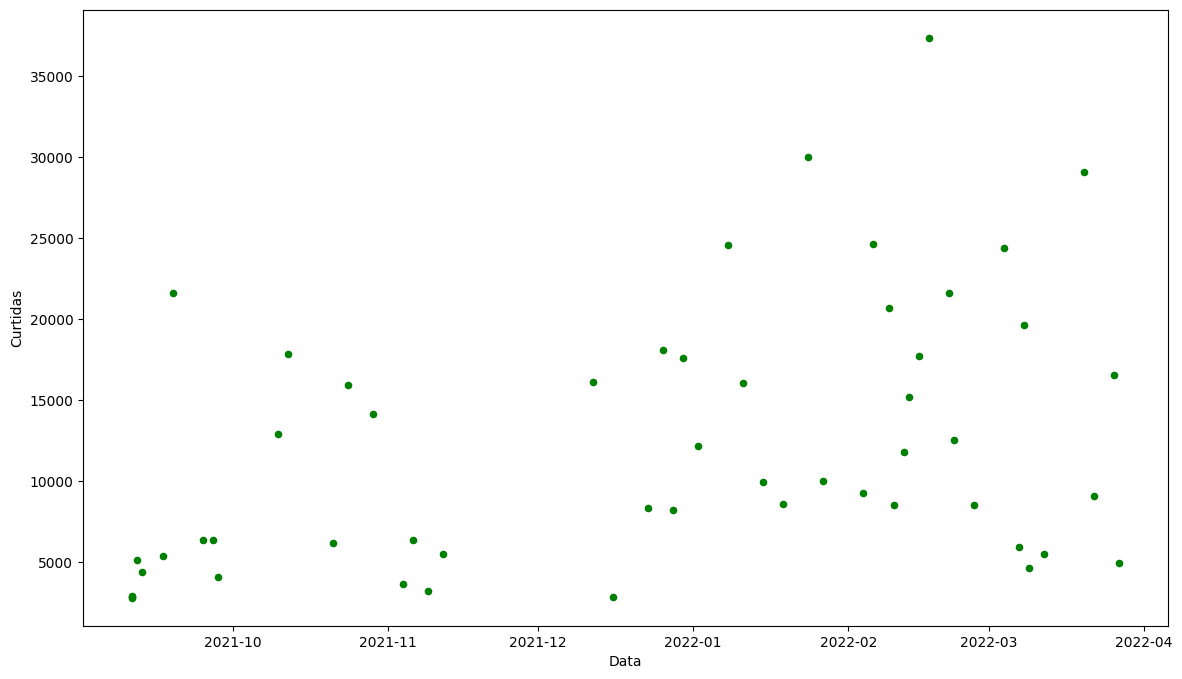

In [18]:
# Um gráfico de dispersão para entender melhor curtidas e comentários

base.plot(kind='scatter', x='Data', y='Curtidas', color='green', figsize=(14,8));

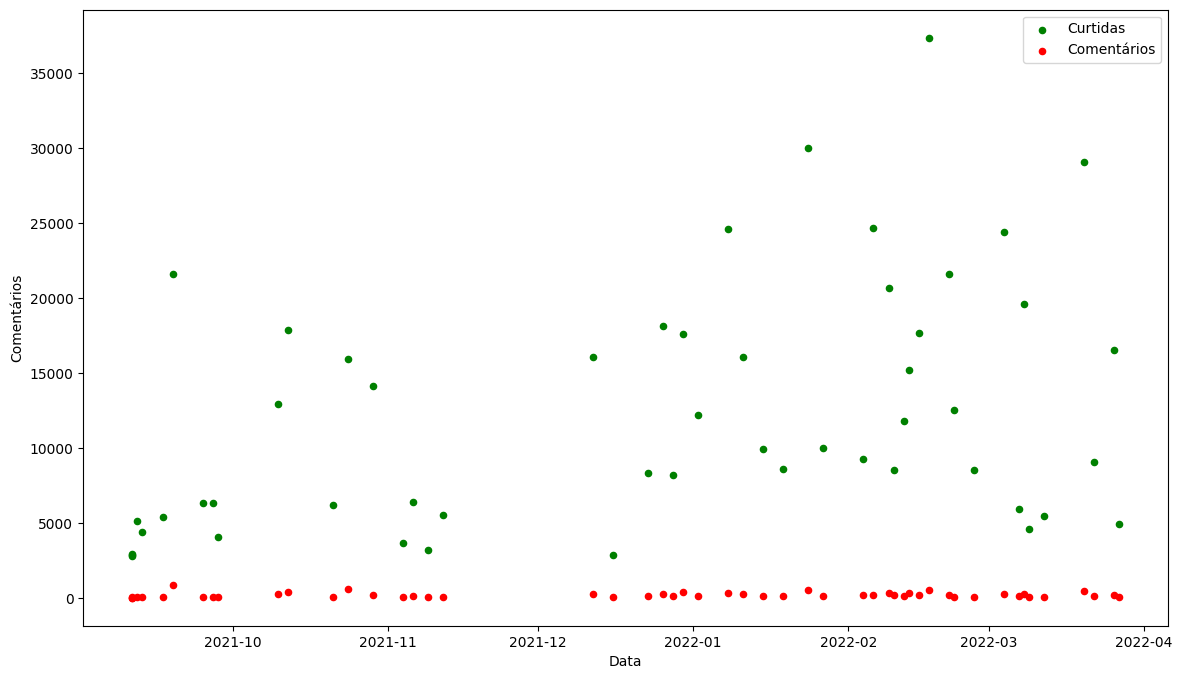

In [19]:
# Colocar curtidas e comentários no mesmo gráfico

ax = base.plot(kind='scatter', x='Data', y='Curtidas', color='green', label='Curtidas', figsize=(14,8));
base.plot(kind='scatter', x='Data', y='Comentários', color='red', label='Comentários', figsize=(14,8), ax=ax);

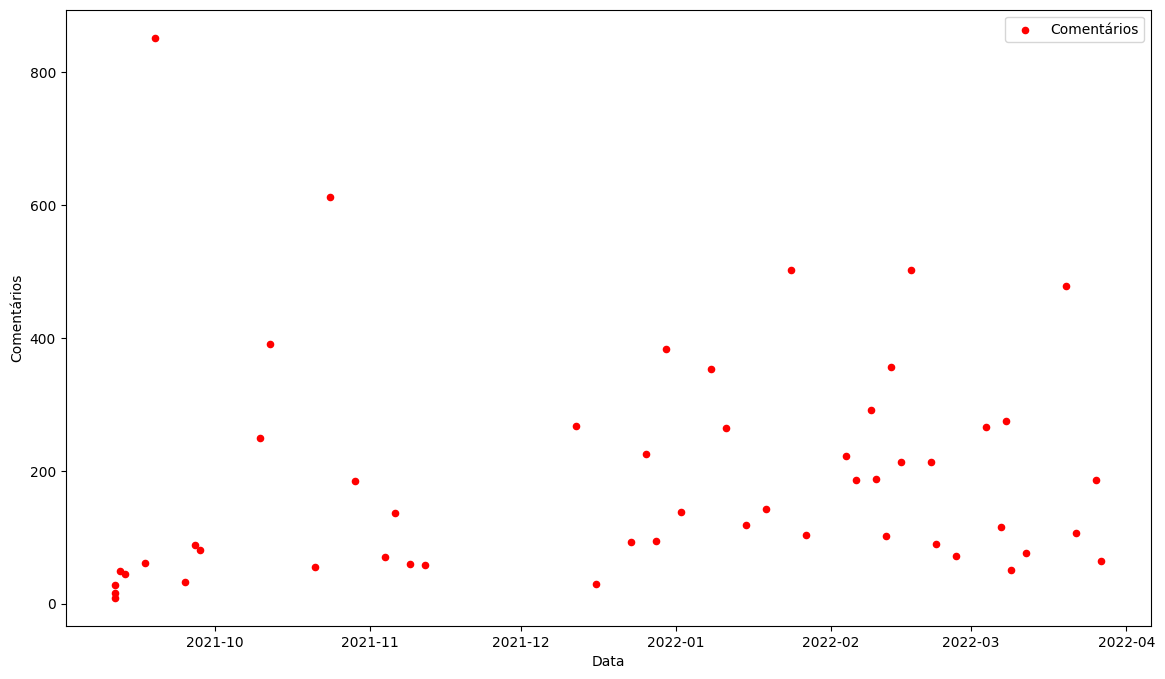

In [20]:
# Escala de curtida atrapalha a visualização, vamos deixar comentários em um gráfico separado

base.plot(kind='scatter', x='Data', y='Comentários', color='red', label='Comentários', figsize=(14,8));

-  O gráfico e as informações não estão  dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
-  Precisamos verificar se existe um padrão usando as outras colunas de informações

A PRIMEIRA COISA QUE PODEMOS FAZER É PEGAR OS 5 PRIMEIROS REGISTROS COM MAIS E MENOS CURTIDAS

In [21]:
# Ordenando os valores mais curtidos
base.sort_values(by='Curtidas', ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [22]:
# Ordenando os valores menos curtidos
base.sort_values(by='Curtidas', ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postanges de campanhas
    

O GROUPBY NOS PERMITE AGREGAR OS DADOS, O QUE FACILITA MUITO A VISUALIZAÇÃO
Ex.:

base.groupby('Coluna1')['Coluna2'].funcao_agregacao()

- O groupby vai agregar pela Coluna1, para analisar a coluna e os dados dela
- A função de agregação será aplicada na coluna2. Vai ser a coluna que fará os cálculos

In [23]:
# Criando padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [24]:
# Média de curtidas por postagens com pessoas
base.groupby('Pessoas')['Curtidas'].mean()

Pessoas
N    4,256.67
S   14,664.55
Name: Curtidas, dtype: float64

In [25]:
# Média de comentários por postagens com pessoas
base.groupby('Pessoas')['Comentários'].mean()

Pessoas
N    52.83
S   230.50
Name: Comentários, dtype: float64

In [26]:
# Média de curtidas por tipo de postagens
base.groupby(['Tipo'])[['Curtidas']].mean()

# Nesse caso pode parecer que o vídeo e o IGTV são estratégias ruins que não devem ser usadas, porém é importante lembrar que a quantidade de postagens de vídeo e IGTV é muito menor comparado a outros tipos de postagem

,Curtidas
Tipo,
Foto,"13,341.14"
IGTV,"6,833.40"
Reels,"14,873.00"
Vídeo,"8,141.50"


In [27]:
# Localizar quantidade de vezes que cada tipo de postagem foi feita
base[['Tipo']].value_counts()

Tipo 
Foto     36
Vídeo     6
IGTV      5
Reels     5
Name: count, dtype: int64

In [28]:
# Agregando por tipo e pessoas
base.groupby(['Tipo', 'Pessoas'])[['Curtidas']].count() # Para adicionar mais colunas basta por colchetes dentro dos parenteses

Curtidas
Tipo  Pessoas          
Foto  N               6
      S              30
IGTV  S               5
Reels N               2
      S               3
Vídeo N               4
      S               2

In [29]:
base.groupby(['Tipo', 'Pessoas'])[['Curtidas', 'Comentários']].mean() # Estamos visualizando as informações pelo tipo e pelas pessoas e aplicando função mean para curtidas e comentários

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

In [30]:
base.groupby(['Tipo', 'Pessoas', 'Campanhas'])[['Curtidas', 'Comentários']].mean() # Agora estamos adicionando campanhas, porém é uma visualização muito poluída

Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

In [31]:
base.groupby(['Pessoas'])[['Curtidas', 'Comentários']].mean() # Somente por pessoas

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


In [32]:
base.groupby(['Campanhas'])[['Curtidas', 'Comentários']].mean() # Somente por campanhas

,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


- QUANDO É UMA POSTAGEM DE CAMPANHA, O ENGAJAMENTO TAMBÉM É MELHOR!

In [33]:
base.groupby(['Tipo'])[['Curtidas', 'Comentários']].mean().reset_index() # Somente por tipo

,Tipo,Curtidas,Comentários
0,Foto,"13,341.14",193.42
1,IGTV,"6,833.40",133.60
2,Reels,"14,873.00",244.40
3,Vídeo,"8,141.50",166.83


In [34]:
# Carrossel sem filtrar a base --> Está errado essa comparação
base.groupby(['Carrossel'])[['Curtidas', 'Comentários']].mean().reset_index()

,Carrossel,Curtidas,Comentários
0,N,"12,343.61",198.43
1,S,"11,817.88",140.38


In [35]:
# Podemos também filtrar a base
base[base.Tipo == 'Foto'].groupby(['Carrossel'])[['Curtidas', 'Comentários']].mean().reset_index()

,Carrossel,Curtidas,Comentários
0,N,"13,776.36",208.57
1,S,"11,817.88",140.38


-- A MÉDIA SEM USAR CARROSSEL É A MELHOR DO QUE QUANDO USAMOS, ENTÃO NÃO É ALGO QUE POSSA IMPACTAR TANTO NO RESULTAD DAS MÍDIAS DESSA EMPRESA OLHANDO INICIALMENTE

        - Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença

In [36]:
# Agregando por pessoas e campanhas
base.groupby(['Pessoas', 'Campanhas'])[['Curtidas', 'Comentários']].mean().reset_index()

# ATENÇÃO: O pandas usa MultiIndex no groupby() e oculta valores repetidos no índice visualmente.
# Isso significa que, se um valor já apareceu na linha anterior, ele não será repetido na exibição,
# mas continua existindo na estrutura do DataFrame.
#
# Para visualizar corretamente e evitar confusão, use:
# base.groupby(['Pessoas', 'Campanhas'])[['Curtidas', 'Comentários']].mean().reset_index()
# Isso transforma o MultiIndex em colunas normais, tornando todas as combinações explícitas.
#
# O MultiIndex é um tipo de índice hierárquico no pandas que permite organizar os dados em mais de um nível. Ele é criado automaticamente quando usamos groupby() com múltiplas colunas ou quando estruturamos dados de forma mais complexa. 

,Pessoas,Campanhas,Curtidas,Comentários
0,N,N,"3,937.50",53.90
1,N,S,"5,852.50",47.50
2,S,N,"9,923.75",157.80
3,S,S,"19,405.35",303.20


- A MÉDIA QUANDO TEM PESSOAS E É PUBLICAÇÃO DE CAMPANHAS É DE CARCA DE 19,4 MIL CURTIDAS, JÁ QUANDO É APENAS PESSOAS (SEM CAMPANHA PASSA PARA QUASE 10 MIL E SE NÃO TIVER PESSOAS CHEGA NO MÁXIMO A 5,9 MIL MESMO EM CAMPANHAS)

- NESSE CASO A GENTE JÁ CONSEGUE MOSTRAR PARA A EMPRESA A IMPORTÂNCIA DE INCLUIR PESSOAS USANDO OS SEUS PRODUTOS, O QUE GERA UM AUMENTO CONSIDERÁVEL NO ENGAJAMENTO

In [37]:
# Agregando por pessoas, campanhas e tipo
base.groupby(['Pessoas', 'Campanhas', 'Tipo'])[['Curtidas', 'Comentários']].mean().reset_index()

,Pessoas,Campanhas,Tipo,Curtidas,Comentários
0,N,N,Foto,"2,869.00",20.50
1,N,N,Reels,"5,934.50",98.00
2,N,N,Vídeo,"4,007.50",65.25
3,N,S,Foto,"5,852.50",47.50
4,S,N,Foto,"10,815.29",159.93
5,S,N,IGTV,"6,833.40",133.60
6,S,N,Reels,"12,894.00",249.00
7,S,S,Foto,"19,105.38",284.19
8,S,S,Reels,"24,801.00",388.50
9,S,S,Vídeo,"16,409.50",370.00


- ANALISANDO NOVAMENTE A QUESTÃO DO VÍDEO, ELE NÃO PARECE MAIS TÃO RUIM ASSIM. QUANDO FEIUTO EM CAMPANHA E USANDO PESSOAS ELE TEVE UM RESULTADO BOM, INCLUSIVE PRÓXIMO A FOTO

- O que poderia ter levado a média é que só temos vídeo ou COM pessoa ou COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)

- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

In [38]:
# Podemos entender o que havia gerado a média baixa no vídeo
# Filtrar a base apenas onde o tipo é vídeo
base[base.Tipo == 'Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


- Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e data comemorativas o resultado foi muito bom!

CONCLUSÕES

- Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém
- Postagens em épocas de campanha também possuem um melhor engajamento
- Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca

In [39]:
# Agrupando por Tags
base.groupby('Tags')[['Curtidas']].mean()

,Curtidas
Tags,
Datas comemorativas,"17,975.00"
Datas comemorativas/Promoções,"29,084.00"
Dicas de como usar/Novos Produtos,"5,703.50"
Dicas de como usar/Produtos,"7,586.67"
Influenciadores,"15,197.29"
Loja,"2,832.50"
Loja/Produtos,"2,930.00"
Novos Produtos,"11,619.57"
Produtos,"5,666.92"


In [40]:
# Separar tags dividindo linhas 2 tags em 2 linhas
base.Tags = base.Tags.str.split('/')
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437


In [41]:
# Explode para separar coluna
base = base.explode('Tags')
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164


In [42]:
# Repetindo a média de curtidas para pessoas
base.groupby('Pessoas')[['Curtidas']].mean() 

,Curtidas
Pessoas,
N,"4,154.62"
S,"14,100.57"


In [43]:
# Média de curtidas por tags
base.groupby('Tags')[['Curtidas']].mean()

,Curtidas
Tags,
Datas comemorativas,"20,752.25"
Dicas de como usar,"6,833.40"
Influenciadores,"15,197.29"
Loja,"2,865.00"
Novos Produtos,"10,304.89"
Produtos,"6,269.82"
Promoções,"27,458.33"
Trends,"20,024.00"


In [44]:
# Ordenando por curtidas
base.groupby('Tags')[['Curtidas']].mean().sort_values('Curtidas', ascending=False) # .sort_values('Coluna', ascending=False) para ordenar

,Curtidas
Tags,
Promoções,"27,458.33"
Datas comemorativas,"20,752.25"
Trends,"20,024.00"
Influenciadores,"15,197.29"
Novos Produtos,"10,304.89"
Dicas de como usar,"6,833.40"
Produtos,"6,269.82"
Loja,"2,865.00"


- Postagens de promoções são as que mais engajam
- Além de promoções, datas comemorativas e trends também possuem um bom engajamento

In [45]:
# Filtrando valores sem tag
base[base.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,N,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,N,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,N,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,N,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,N,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737


In [46]:
# Atribuindo o texto sem tag para as colunsa onde a tag é NaN
base.loc[base.Tags.isnull(), 'Tags'] = 'Sem tag'

In [47]:
# Mostrrando novamente a tabela de curtidas por tags
base.groupby('Tags')[['Curtidas']].mean().sort_values('Curtidas', ascending=False)

,Curtidas
Tags,
Promoções,"27,458.33"
Datas comemorativas,"20,752.25"
Trends,"20,024.00"
Sem tag,"15,347.88"
Influenciadores,"15,197.29"
Novos Produtos,"10,304.89"
Dicas de como usar,"6,833.40"
Produtos,"6,269.82"
Loja,"2,865.00"


In [48]:
# Podemos voltar com NaN caso a gente queira somente ignorar esses valores conforme orientado
base.loc[base.Tags == 'Sem tag', 'Tags'] = np.nan

In [49]:
# E essas linhas novamente param de ser consideradas na agregação
base.groupby('Tags')[['Curtidas']].mean().sort_values('Curtidas', ascending=False)

,Curtidas
Tags,
Promoções,"27,458.33"
Datas comemorativas,"20,752.25"
Trends,"20,024.00"
Influenciadores,"15,197.29"
Novos Produtos,"10,304.89"
Dicas de como usar,"6,833.40"
Produtos,"6,269.82"
Loja,"2,865.00"


In [50]:
# Pessoas e tags
base.groupby(['Tags', 'Pessoas'])[['Curtidas', 'Comentários']].mean().sort_values('Curtidas', ascending=False)

,,Curtidas,Comentários
Tags,Pessoas,,
Promoções,S,"27,458.33",531.00
Datas comemorativas,S,"20,752.25",343.50
Trends,S,"20,024.00",352.25
Influenciadores,S,"15,197.29",161.71
Novos Produtos,S,"10,923.12",215.62
Produtos,S,"8,316.38",131.62
Dicas de como usar,S,"6,833.40",133.60
Novos Produtos,N,"5,359.00",62.00
Produtos,N,"4,450.67",60.78


In [51]:
base.groupby(['Tags', 'Campanhas'])[['Curtidas', 'Comentários']].mean().sort_values('Curtidas', ascending=False)

Curtidas  Comentários
Tags                Campanhas                       
Promoções           S         33,217.50       490.50
Trends              S         22,400.67       386.67
Datas comemorativas S         20,752.25       343.50
Influenciadores     S         18,715.40       197.60
Promoções           N         15,940.00       612.00
Trends              N         12,894.00       249.00
Novos Produtos      S         11,040.67       323.00
                    N          9,937.00       136.33
Produtos            S          9,074.00        67.50
Dicas de como usar  N          6,833.40       133.60
Influenciadores     N          6,402.00        72.00
Produtos            N          5,895.93        97.67
Loja                N          2,865.00        17.67

CONCLUSÕES

- Ter o rosto de outras pessoas é fundamental para um bom engajament na publicação
 - Em todas as tags, quando havia rosto, o resultado foi muito melhor

- Criar campanhas ajuda muito na divulgação da marca
- Promoções tiveram um desempenho absurdamente maior que qualquer outra tags
 - Porém é uma tag que pode ter custo para a loja, o que deve ser analisado

- Usar conteúdos que estão em trend também ajudam na divulgação da marca, mesmo a trend sendo de outros nichos
- A melhor maneira de mostrar produtos é através de outras pessoas utilizando-os, e se possível em campanahs de datas especiais
- Para novos produtos a inclusão de pessoas é mais crítica ainda, sendo quase o dobro quando há um rosto junto ao produto
- Não podemos afirmar que a tag LOJA é ruim até testarmos essa tag incluindo pessoas ou em uma campanha. Vale o teste para verificar!
- Continuaremos a monitorar as postagens para encontrar novos padrões dado que ainda temos poucas informações da base